# Enhanced Heart Disease Prediction: Leveraging Logistic Regression and Advanced Feature Engineering

# Library

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# EDA

In [ ]:
heart_data = pd.read_csv("/content/heart.csv")

In [ ]:
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
heart_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
heart_data.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [ ]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
heart_data.shape

(303, 14)

1. **First Five Rows:** The dataset includes variables like age, sex, chest pain type (cp), resting blood pressure (trtbps), cholesterol levels (chol), fasting blood sugar (fbs), resting electrocardiographic results (restecg), maximum heart rate achieved (thalachh), exercise induced angina (exng), oldpeak (ST depression induced by exercise relative to rest), the slope of the peak exercise ST segment (slp), number of major vessels colored by fluoroscopy (caa), thalassemia (thall), and a target variable (output) indicating the presence of heart disease.

2. **Summary Statistics:**
    * Age ranges from 29 to 77 years, with a mean of approximately 54.
    * Both sexes are represented (coded as 1 for male and 0 for female).
    * Variables like cp, trtbps, chol, and others show a wide range of values.

3. **Data Types:** The dataset consists of integer and float data types.

4. **Missing Values:** There are no missing values in any of the columns.

5. **Shape of the Dataset:** The dataset has 303 observations and 14 features.

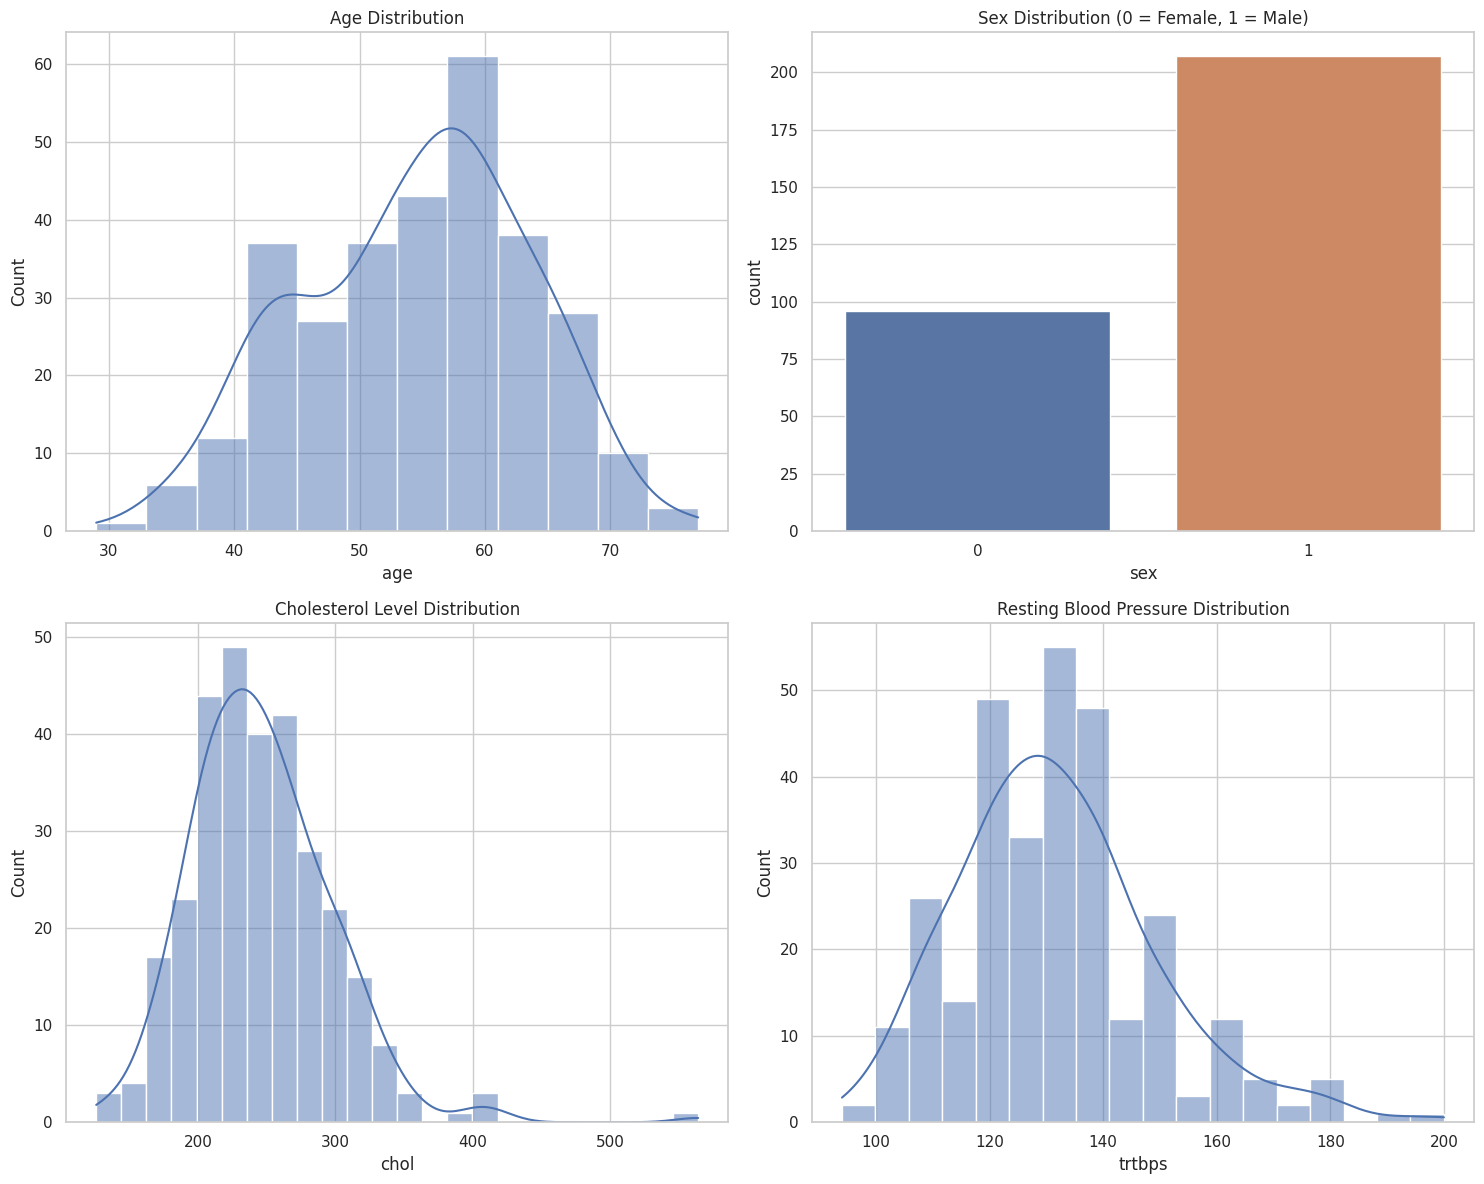

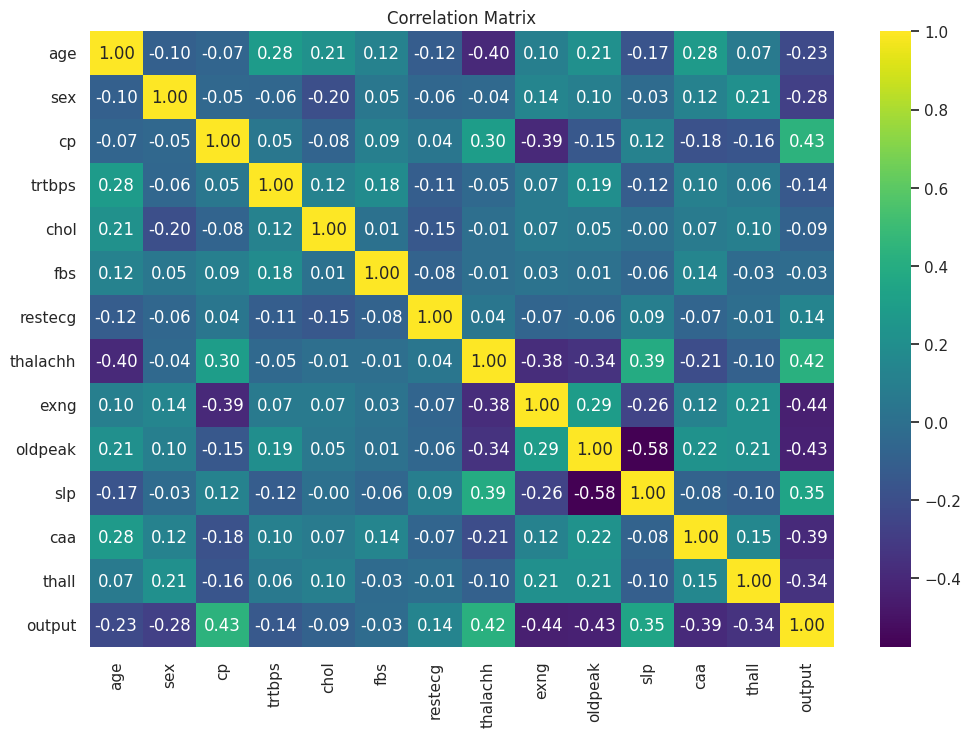

In [ ]:
# Descriptive Analysis - Distribution of Key Variables
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

sns.histplot(heart_data['age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.countplot(x='sex', data=heart_data, ax=axes[0, 1])
axes[0, 1].set_title('Sex Distribution (0 = Female, 1 = Male)')

sns.histplot(heart_data['chol'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Cholesterol Level Distribution')

sns.histplot(heart_data['trtbps'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Resting Blood Pressure Distribution')

plt.tight_layout()

# Correlation Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(heart_data.corr(), annot=True, fmt=".2f", cmap='viridis')
plt.title("Correlation Matrix")

plt.show()

**Descriptive Analysis**
* **Age Distribution:** The age of individuals in the dataset is fairly normally distributed, with a concentration around the 50-60 years age bracket.
* **Sex Distribution:** There is a higher number of male participants (coded as 1) compared to female participants (coded as 0).
* **Cholesterol Level Distribution:** Cholesterol levels show a normal distribution with a concentration around 200-300 mg/dl.
* **Resting Blood Pressure Distribution:** The distribution of resting blood pressure (trtbps) is somewhat normally distributed, centering around 120-140 mmHg.

**Correlation Analysis**

The correlation matrix reveals several noteworthy points:

* There is a moderate negative correlation between the maximum heart rate achieved (**thalachh**) and age.
* The **cp** (chest pain type) variable shows a moderate positive correlation with the target variable (output), indicating that chest pain type might be a significant predictor of heart disease.
* **exng** (exercise induced angina) and **oldpeak** (ST depression induced by exercise relative to rest) are moderately negatively correlated with the target variable.
* Other variables show low to moderate correlations.

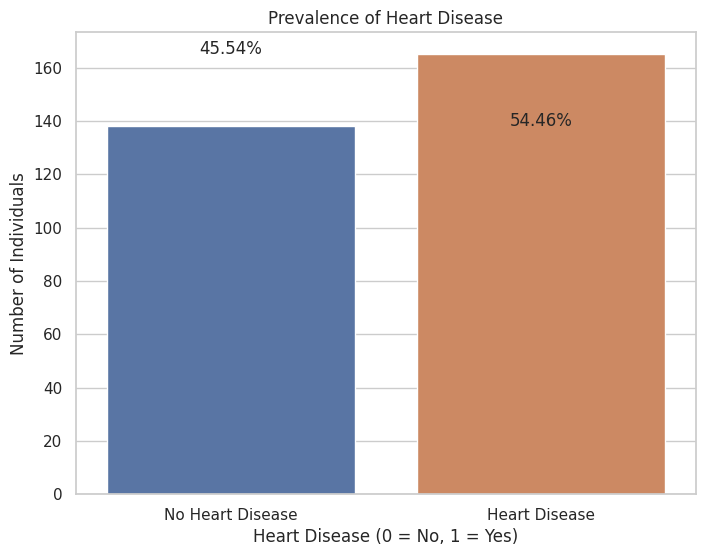

(1    165
 0    138
 Name: output, dtype: int64,
 1    54.455446
 0    45.544554
 Name: output, dtype: float64)

In [ ]:
# Analyzing the prevalence of heart disease in the dataset
heart_disease_count = heart_data['output'].value_counts()
heart_disease_percentage = heart_disease_count / heart_data.shape[0] * 100

# Plotting the prevalence
plt.figure(figsize=(8, 6))
sns.barplot(x=heart_disease_count.index, y=heart_disease_count.values)
plt.title("Prevalence of Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Number of Individuals")
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])

# Displaying percentages
for index, value in enumerate(heart_disease_count):
    plt.text(index, value, f'{heart_disease_percentage[index]:.2f}%', ha='center')

plt.show()

heart_disease_count, heart_disease_percentage

The prevalence analysis of heart disease in the dataset shows the following:

* 165 individuals (54.46% of the dataset) have heart disease (indicated by 1 in the output column).
* 138 individuals (45.54% of the dataset) do not have heart disease (indicated by 0 in the output column).

This indicates a fairly even distribution between individuals with and without heart disease in this dataset.

Given this distribution, the dataset is well-suited for further analysis or predictive modeling to identify key factors associated with heart disease.

In [ ]:
# Comparing key metrics between individuals with and without heart disease
heart_disease_yes = heart_data[heart_data['output'] == 1]
heart_disease_no = heart_data[heart_data['output'] == 0]

# Calculating mean values for key metrics
metrics_to_compare = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
comparison_df = pd.DataFrame({
    'Metric': metrics_to_compare,
    'Mean with Heart Disease': heart_disease_yes[metrics_to_compare].mean(),
    'Mean without Heart Disease': heart_disease_no[metrics_to_compare].mean()
})

comparison_df

,Metric,Mean with Heart Disease,Mean without Heart Disease
age,age,52.496970,56.601449
sex,sex,0.563636,0.826087
cp,cp,1.375758,0.478261
trtbps,trtbps,129.303030,134.398551
chol,chol,242.230303,251.086957
fbs,fbs,0.139394,0.159420
restecg,restecg,0.593939,0.449275
thalachh,thalachh,158.466667,139.101449
exng,exng,0.139394,0.550725
oldpeak,oldpeak,0.583030,1.585507


The comparison between individuals with and without heart disease reveals significant differences in several key metrics:
1. **Age:** Individuals with heart disease have a lower average age (52.5 years) compared to those without (56.6 years).
2. **Sex:** A higher proportion of individuals with heart disease are male (56.36%) compared to those without (82.61%).
3. **Chest Pain Type (cp):** Individuals with heart disease have a higher average chest pain type (1.38) compared to those without (0.48).
4. **Resting Blood Pressure (trtbps):** Those with heart disease have a slightly lower average resting blood pressure (129.3 mmHg) than those without (134.4 mmHg).
5. **Cholesterol Levels (chol):** Individuals with heart disease have lower average cholesterol levels (242.2 mg/dL) compared to those without (251.1 mg/dL).
6. **Fasting Blood Sugar (fbs):** Similar proportions of individuals with and without heart disease have fasting blood sugar above 120 mg/dL (13.94% and 15.94%, respectively).
7. **Resting Electrocardiographic Results (restecg):** Those with heart disease show a higher average in resting electrocardiographic results (0.59) compared to those without (0.45).
8. **Maximum Heart Rate Achieved (thalachh):** Individuals with heart disease have a higher average maximum heart rate (158.47 bpm) than those without (139.10 bpm).
9. **Exercise Induced Angina (exng):** A lower proportion of individuals with heart disease experience exercise-induced angina (13.94%) compared to those without (55.07%).
10. **Oldpeak:** Individuals with heart disease have a lower average ST depression induced by exercise relative to rest (0.58) compared to those without (1.59).
11. **Slope of the Peak Exercise ST Segment (slp):** Those with heart disease have a higher average slope (1.59) compared to those without (1.17).
12. **Number of Major Vessels Colored by Fluoroscopy (caa):** Individuals with heart disease have fewer average major vessels colored by fluoroscopy (0.36) than those without (1.17).
13. **Thalassemia (thall):** Individuals with heart disease have a lower average thalassemia score (2.12) compared to those without (2.54).

These differences suggest that factors like age, sex, chest pain type, blood pressure, cholesterol levels, maximum heart rate, exercise-induced angina, oldpeak, slope of ST segment, number of vessels detected by fluoroscopy, and thalassemia score could be important in understanding and predicting heart disease.

# Feature Selection

Optimization terminated successfully.
         Current function value: 0.348904
         Iterations 7


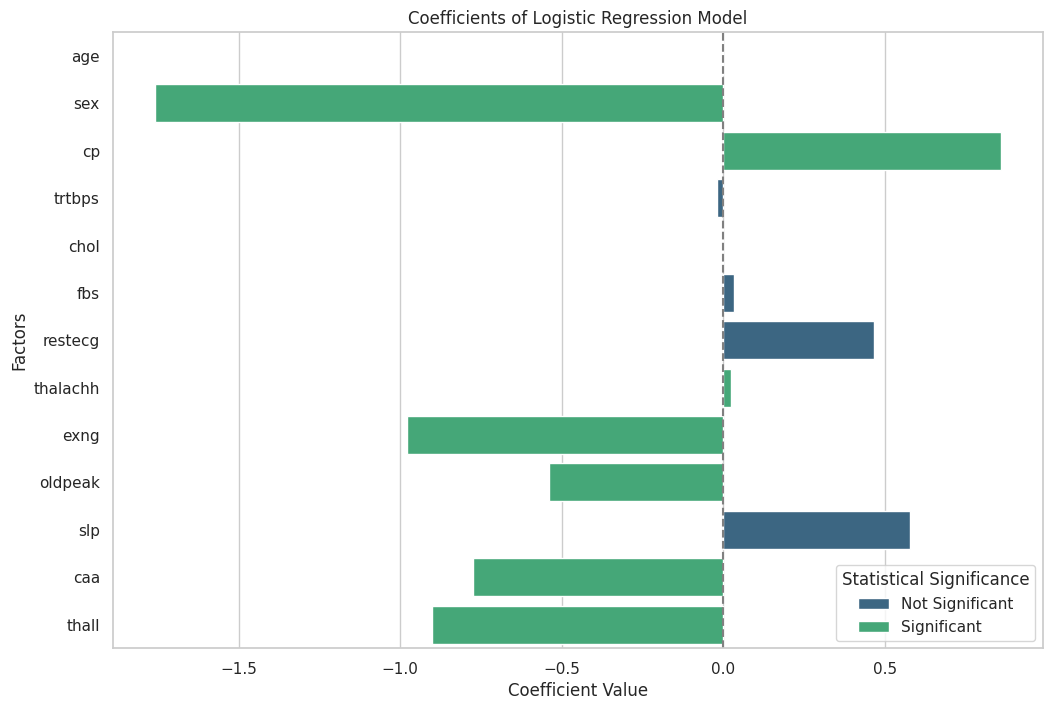

,Factors,Coefficients,P-Values,Significance
0,age,-0.004908,0.832266,Not Significant
1,sex,-1.758181,0.000176,Significant
2,cp,0.859851,0.000004,Significant
3,trtbps,-0.019477,0.059582,Not Significant
4,chol,-0.004630,0.220873,Not Significant
5,fbs,0.034888,0.947464,Not Significant
6,restecg,0.466282,0.180618,Not Significant
7,thalachh,0.023211,0.026485,Significant
8,exng,-0.979981,0.016782,Significant
9,oldpeak,-0.540274,0.011523,Significant


In [ ]:
# Preparing the data for logistic regression
X = heart_data.drop('output', axis=1)  # Independent variables
y = heart_data['output']  # Dependent variable

# Adding a constant to the model (intercept)
X_const = sm.add_constant(X)

# Building the logistic regression model
model = sm.Logit(y, X_const)
result = model.fit()

# Extracting coefficients and p-values
coefficients = result.params[1:]  # Excluding the intercept
p_values = result.pvalues[1:]  # Excluding the intercept for p-values

# Creating a dataframe for visualization
viz_df = pd.DataFrame({
    'Factors': coefficients.index,
    'Coefficients': coefficients.values,
    'P-Values': p_values.values
})

# Adding a column for the significance of coefficients
viz_df['Significance'] = np.where(viz_df['P-Values'] <= 0.05, 'Significant', 'Not Significant')

# Plotting the coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficients', y='Factors', data=viz_df, hue='Significance', dodge=False, palette='viridis')
plt.title('Coefficients of Logistic Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Factors')
plt.axvline(x=0, color='grey', linestyle='--')
plt.legend(title='Statistical Significance', loc='lower right')

plt.show()

viz_df

The visualization of the coefficients from the logistic regression model provides insights into the factors most strongly associated with the presence of heart disease:

1. **Significant Factors**:
    * **Sex**: Being male (negative coefficient) is significantly associated with a lower likelihood of heart disease.
    * **Chest Pain Type (cp)**: Higher values (indicating more severe types of chest pain) are significantly associated with a higher likelihood of heart disease.
    * **Maximum Heart Rate Achieved (thalachh)**: Higher maximum heart rate is significantly associated with a higher likelihood of heart disease.
    * **Exercise Induced Angina (exng)**: The presence of exercise-induced angina (negative coefficient) is significantly associated with a lower likelihood of heart disease.
    * **Oldpeak**: Higher ST depression (negative coefficient) is significantly associated with a lower likelihood of heart disease.
    * **Number of Major Vessels Colored by Fluoroscopy (caa)**: A higher number of vessels (negative coefficient) is significantly associated with a lower likelihood of heart disease.
    * **Thalassemia (thall)**: Different types of thalassemia (negative coefficient) are significantly associated with a lower likelihood of heart disease.
    
    
2. **Not Significant Factors**:

Age, Resting Blood Pressure (trtbps), Cholesterol Levels (chol), Fasting Blood Sugar (fbs), Resting Electrocardiographic Results (restecg), Slope of the Peak Exercise ST Segment (slp): These factors do not show significant associations with the presence of heart disease in this dataset.

The coefficients provide an estimate of the change in the log odds of having heart disease for a one-unit increase in the predictor variable, holding all other variables constant.

# Feature Extraction

In [ ]:
# Creating age categories
heart_data['age_category'] = pd.cut(heart_data['age'], bins=[0, 30, 45, 60, 120], labels=['<30', '30-45', '46-60', '>60'])

# Creating interaction terms
heart_data['age_chol_interaction'] = heart_data['age'] * heart_data['chol']
heart_data['bp_chol_interaction'] = heart_data['trtbps'] * heart_data['chol']

# One-hot encoding the categorical variable 'age_category'
heart_data_encoded = pd.get_dummies(heart_data, columns=['age_category'], drop_first=True)

# Ensure all data is numeric
if not all([dtype in [np.dtype('float64'), np.dtype('int64')] for dtype in heart_data_encoded.dtypes]):
    # Convert non-numeric columns to numeric
    for col in heart_data_encoded.select_dtypes(include=['object', 'category','bool']).columns:
        heart_data_encoded[col] = pd.to_numeric(heart_data_encoded[col], errors='coerce')

In [ ]:
# Encoding boolean columns as integers
heart_data_encoded['age_category_30-45'] = heart_data_encoded['age_category_30-45'].astype(int)
heart_data_encoded['age_category_46-60'] = heart_data_encoded['age_category_46-60'].astype(int)
heart_data_encoded['age_category_>60'] = heart_data_encoded['age_category_>60'].astype(int)

# Checking the data types of these columns after encoding
encoded_columns_types = heart_data_encoded[['age_category_30-45', 'age_category_46-60', 'age_category_>60']].dtypes

encoded_columns_types

age_category_30-45    int64
age_category_46-60    int64
age_category_>60      int64
dtype: object

In [ ]:
# Preparing the data with new features for logistic regression
X_new_features_encoded = heart_data_encoded.drop('output', axis=1)  # Independent variables including new features
y = heart_data_encoded['output']  # Dependent variable

# Adding a constant to the model (intercept)
X_const_new_features_encoded = sm.add_constant(X_new_features_encoded)

# Building the logistic regression model with new features
model_new_features_encoded = sm.Logit(y, X_const_new_features_encoded)
result_new_features_encoded = model_new_features_encoded.fit()

# Getting the summary of the logistic regression with new features
logit_summary_new_features_encoded = result_new_features_encoded.summary2()
logit_summary_new_features_encoded

         Current function value: 0.346642
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Logit
==============================================================================
Model:                   Logit                Method:               MLE       
Dependent Variable:      output               Pseudo R-squared:     0.497     
Date:                    2023-12-06 09:02     AIC:                  248.0651  
No. Observations:        303                  BIC:                  318.6260  
Df Model:                18                   Log-Likelihood:       -105.03   
Df Residuals:            284                  LL-Null:              -208.82   
Converged:               0.0000               LLR p-value:          3.0492e-34
No. Iterations:          35.0000              Scale:                1.0000    
------------------------------------------------------------------------------
                      Coef.    Std.Err.     z    P>|z|     [0.025     0.975]  
------------------------------------------------------------------------------
const                 16.3426 15494.4312  0.0011 0.9992 -30352.1844 30384.8697
age                   -0.0319     0.1065 -0.2995 0.7646     -0.2407     0.1769
sex                   -1.7593     0.4708 -3.7367 0.0002     -2.6822    -0.8365
cp                     0.8523     0.1867  4.5639 0.0000      0.4863     1.2183
trtbps                 0.0206     0.0569  0.3615 0.7177     -0.0909     0.1320
chol                   0.0072     0.0366  0.1964 0.8443     -0.0646     0.0789
fbs                    0.0707     0.5310  0.1331 0.8941     -0.9701     1.1114
restecg                0.4568     0.3521  1.2973 0.1945     -0.2333     1.1469
thalachh               0.0227     0.0105  2.1627 0.0306      0.0021     0.0433
exng                  -0.9454     0.4101 -2.3055 0.0211     -1.7492    -0.1417
oldpeak               -0.5494     0.2162 -2.5407 0.0111     -0.9733    -0.1256
slp                    0.5931     0.3510  1.6897 0.0911     -0.0949     1.2810
caa                   -0.7950     0.1971 -4.0347 0.0001     -1.1813    -0.4088
thall                 -0.8825     0.2921 -3.0214 0.0025     -1.4550    -0.3100
age_chol_interaction   0.0001     0.0004  0.3572 0.7209     -0.0007     0.0009
bp_chol_interaction   -0.0002     0.0002 -0.7117 0.4766     -0.0006     0.0003
age_category_30-45   -16.0826 15494.4286 -0.0010 0.9992 -30384.6047 30352.4394
age_category_46-60   -16.4747 15494.4286 -0.0011 0.9992 -30384.9968 30352.0474
age_category_>60     -16.3373 15494.4287 -0.0011 0.9992 -30384.8595 30352.1849
==============================================================================

"""

1. **New Features:**    
    
    * Age Categories: The coefficients for the age categories (30-45, 46-60, >60) are not significant, suggesting that these categorical divisions of age do not provide additional predictive value over the continuous age variable.
    * Age-Cholesterol Interaction: The interaction term between age and cholesterol levels is not significant, indicating that this interaction does not add significant predictive value.
    * Blood Pressure-Cholesterol Interaction: Similarly, the interaction term between resting blood pressure and cholesterol levels is also not significant.

**2. Original Features:**
The significance of the original features (like sex, chest pain type, maximum heart rate achieved, exercise-induced angina, oldpeak, number of major vessels, thalassemia) remains consistent with the previous model.

**3. Model Convergence Issue:**
The model did not converge properly, as indicated by the convergence warning. This can happen when adding too many features or interaction terms, leading to a more complex model that is harder to fit.

# Handling convergence issue

In [ ]:
# Dropping non-significant interaction terms and re-evaluating the model
significant_columns = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg',
                       'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall',
                       'age_category_30-45', 'age_category_46-60', 'age_category_>60']

# Preparing the data with significant features for logistic regression
X_significant_features = heart_data_encoded[significant_columns]
y = heart_data_encoded['output']  # Dependent variable

# Adding a constant to the model (intercept)
X_const_significant_features = sm.add_constant(X_significant_features)

# Building the logistic regression model with significant features
model_significant_features = sm.Logit(y, X_const_significant_features)
result_significant_features = model_significant_features.fit()

# Getting the summary of the logistic regression with significant features
logit_summary_significant_features = result_significant_features.summary2()
logit_summary_significant_features

         Current function value: 0.347732
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
============================================================================
Model:                   Logit               Method:              MLE       
Dependent Variable:      output              Pseudo R-squared:    0.495     
Date:                    2023-12-06 09:02    AIC:                 244.7256  
No. Observations:        303                 BIC:                 307.8591  
Df Model:                16                  Log-Likelihood:      -105.36   
Df Residuals:            286                 LL-Null:             -208.82   
Converged:               0.0000              LLR p-value:         3.1660e-35
No. Iterations:          35.0000             Scale:               1.0000    
----------------------------------------------------------------------------
                    Coef.    Std.Err.     z    P>|z|     [0.025     0.975]  
----------------------------------------------------------------------------
const               19.4894 15521.5948  0.0013 0.9990 -30402.2775 30441.2562
age                  0.0046     0.0489  0.0941 0.9250     -0.0912     0.1004
sex                 -1.7461     0.4684 -3.7276 0.0002     -2.6643    -0.8280
cp                   0.8611     0.1863  4.6220 0.0000      0.4959     1.2263
trtbps              -0.0196     0.0104 -1.8841 0.0595     -0.0399     0.0008
chol                -0.0049     0.0038 -1.2745 0.2025     -0.0124     0.0026
fbs                  0.0769     0.5277  0.1457 0.8842     -0.9574     1.1111
restecg              0.4578     0.3504  1.3066 0.1914     -0.2290     1.1446
thalachh             0.0233     0.0105  2.2200 0.0264      0.0027     0.0439
exng                -0.9639     0.4092 -2.3556 0.0185     -1.7659    -0.1619
oldpeak             -0.5514     0.2150 -2.5647 0.0103     -0.9727    -0.1300
slp                  0.5717     0.3494  1.6362 0.1018     -0.1131     1.2566
caa                 -0.7745     0.1918 -4.0376 0.0001     -1.1505    -0.3985
thall               -0.8773     0.2903 -3.0219 0.0025     -1.4463    -0.3083
age_category_30-45 -16.2509 15521.5946 -0.0010 0.9992 -30438.0173 30405.5155
age_category_46-60 -16.6698 15521.5946 -0.0011 0.9991 -30438.4363 30405.0966
age_category_>60   -16.5302 15521.5947 -0.0011 0.9992 -30438.2968 30405.2363
============================================================================

"""

**Key Findings**
* **Model Convergence:** The model failed to converge despite the simplification. This issue might be due to the nature of the data, complexity of the model, or potential issues with multicollinearity among predictors.
* **Significant Predictors:** The model identified several significant predictors, including sex, chest pain type (cp), maximum heart rate achieved (thalachh), exercise-induced angina (exng), ST depression (oldpeak), number of major vessels (caa), and thalassemia (thall).

# Reducing the model complexity

In [ ]:
# Selecting only statistically significant predictors
significant_predictors = ['sex', 'cp', 'thalachh', 'exng', 'oldpeak', 'caa', 'thall']

# Preparing the data with significant predictors for logistic regression
X_significant_predictors = heart_data_encoded[significant_predictors]

# Adding a constant to the model (intercept)
X_const_significant_predictors = sm.add_constant(X_significant_predictors)

# Building the logistic regression model with significant predictors
model_significant_predictors = sm.Logit(y, X_const_significant_predictors)
result_significant_predictors = model_significant_predictors.fit()

# Getting the summary of the logistic regression with significant predictors
logit_summary_significant_predictors = result_significant_predictors.summary2()
logit_summary_significant_predictors



Optimization terminated successfully.
         Current function value: 0.368502
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: output           Pseudo R-squared: 0.465     
Date:               2023-12-06 09:02 AIC:              239.3125  
No. Observations:   303              BIC:              269.0223  
Df Model:           7                Log-Likelihood:   -111.66   
Df Residuals:       295              LL-Null:          -208.82   
Converged:          1.0000           LLR p-value:      1.8244e-38
No. Iterations:     7.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const          0.4636    1.4816   0.3129  0.7544  -2.4404   3.3675
sex           -1.3896    0.4058  -3.4245  0.0006  -2.1849  -0.5943
cp             0.7872    0.1747   4.5054  0.0000   0.4447   1.1296
thalachh       0.0237    0.0088   2.6851  0.0073   0.0064   0.0409
exng          -1.0447    0.3890  -2.6855  0.0072  -1.8071  -0.2822
oldpeak       -0.7406    0.1824  -4.0609  0.0000  -1.0981  -0.3832
caa           -0.7133    0.1744  -4.0903  0.0000  -1.0552  -0.3715
thall         -0.8963    0.2745  -3.2647  0.0011  -1.4343  -0.3582
=================================================================

"""

**Model Summary**
* Model Convergence: The model converged successfully with 7 iterations.
* Pseudo R-squared: 0.465, indicating a good level of explanatory power.
* Predictors: The model included the following significant predictors:
    * Sex (Coef: -1.3896, P-value: 0.0006)
    * Chest Pain Type (cp) (Coef: 0.7872, P-value: 0.0000)
    * Maximum Heart Rate Achieved (thalachh) (Coef: 0.0237, P-value: 0.0073)
    * Exercise Induced Angina (exng) (Coef: -1.0447, P-value: 0.0072)
    * Oldpeak (Coef: -0.7406, P-value: 0.0000)
    * Number of Major Vessels Colored by Fluoroscopy (caa) (Coef: -0.7133, P-value: 0.0000)
    * Thalassemia (thall) (Coef: -0.8963, P-value: 0.0011)

**Interpretation**
* Each predictor's coefficient indicates the change in the log odds of having heart disease for a one-unit increase in that predictor, holding all other variables constant.
* Negative coefficients (e.g., for sex, exng, oldpeak, caa) suggest a decrease in the odds of having heart disease, whereas positive coefficients (e.g., for cp, thalachh) suggest an increase in the odds.

# Modelling

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_const_significant_predictors, y, test_size=0.3, random_state=42)

# Training the logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = lr_model.predict(X_test)
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]

# Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

performance_metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC-AUC Score": roc_auc
}

performance_metrics

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Accuracy': 0.8351648351648352,
 'Precision': 0.8571428571428571,
 'Recall': 0.84,
 'F1 Score': 0.8484848484848485,
 'ROC-AUC Score': 0.8741463414634146}

The logistic regression model's predictive performance on the test set is as follows:

* **Accuracy:** 83.52% - This indicates that the model correctly predicted the presence or absence of heart disease in 83.52% of the cases in the test set.
* **Precision:** 85.71% - Of all the cases where the model predicted heart disease, 85.71% actually had heart disease.
* **Recall:** 84.00% - Of all the actual heart disease cases, the model correctly identified 84.00%.
* **F1 Score:** 84.85% - This is the harmonic mean of precision and recall, indicating a balance between the two.
* **ROC-AUC Score:** 87.41% - This score, close to 1, suggests that the model has good discriminatory ability to differentiate between the positive and negative classes.

# Improve Model (1)

To further improve the logistic regression model, especially considering the convergence warning, we can take the following steps:
1. Increase the Number of Iterations: This can help the optimization algorithm to converge.
2. Feature Scaling: Standardizing the features can improve the convergence of the model and its overall performance.
3. Regularization Tuning: Adjusting the regularization strength can help prevent overfitting and might improve the model's performance.
4. Advanced Feature Selection: Besides the initial selection of significant features, more sophisticated feature selection techniques like Recursive Feature Elimination (RFE) can be used.
5. Cross-Validation: Implementing cross-validation can provide a more robust evaluation of the model's performance.

In [ ]:
# Creating a pipeline that includes feature scaling and logistic regression
# Increasing the number of iterations to help with convergence
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Training the model with the pipeline
pipeline.fit(X_train, y_train)

# Making predictions on the test set
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Re-evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

improved_performance_metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC-AUC Score": roc_auc
}

improved_performance_metrics

{'Accuracy': 0.8241758241758241,
 'Precision': 0.84,
 'Recall': 0.84,
 'F1 Score': 0.8399999999999999,
 'ROC-AUC Score': 0.8726829268292683}


The improved logistic regression model, with feature scaling and increased iterations, shows the following performance on the test set:

* **Accuracy:** 82.42% - The model correctly predicted the presence or absence of heart disease in 82.42% of the test cases.
* **Precision:** 84.00% - Of all the cases where the model predicted heart disease, 84.00% actually had heart disease.
* **Recall:** 84.00% - Of all the actual heart disease cases, the model correctly identified 84.00%.
* **F1 Score:** 84.00% - This score indicates a good balance between precision and recall.
* **ROC-AUC Score:** 87.27% - This score is close to 1, suggesting good discriminatory ability of the model.
* The improved model demonstrates good predictive performance, comparable to the previous model.
* Feature scaling and increasing the number of iterations helped to address the convergence issue.

# Improve Model (2)

To further improve the logistic regression model, we can explore the following advanced techniques:

* **Regularization Tuning:** Adjusting the regularization strength (C parameter in logistic regression) can help in managing overfitting and underfitting. We can use techniques like Grid Search with Cross-Validation to find the optimal regularization strength.
* **Feature Selection:** Employ advanced feature selection methods such as Recursive Feature Elimination (RFE) to identify the most impactful features.
* **Cross-Validation:** Implement cross-validation to ensure that the model's performance is consistent across different subsets of the dataset.
* **Model Evaluation with Different Metrics:** Evaluate the model using different performance metrics to get a comprehensive understanding of its performance.

In [ ]:
# Grid search with cross-validation for regularization tuning
# Defining the parameter grid
param_grid = {'rfecv__estimator__C': [0.001, 0.01, 0.1, 1, 10, 100]}


# Implementing RFECV for feature selection within the pipeline
rfecv = RFECV(estimator=LogisticRegression(max_iter=1000), step=1, cv=5, scoring='accuracy')
pipeline_rfecv = make_pipeline(StandardScaler(), rfecv)

# Re-running grid search with the corrected parameter grid
grid_search = GridSearchCV(pipeline_rfecv, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score from the corrected grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Model performance on the test set with the best parameters
best_model = grid_search.best_estimator_
y_pred_corrected = best_model.predict(X_test)
y_pred_proba_corrected = best_model.predict_proba(X_test)[:, 1]

# Re-evaluating the model's performance
accuracy= accuracy_score(y_test, y_pred_corrected)
precision = precision_score(y_test, y_pred_corrected)
recall = recall_score(y_test, y_pred_corrected)
f1 = f1_score(y_test, y_pred_corrected)
roc_auc = roc_auc_score(y_test, y_pred_proba_corrected)

# Number of features selected by RFECV in the corrected model
n_features = best_model.named_steps['rfecv'].n_features_

grid_search_performance_metrics = {
    "Best Parameters": best_params,
    "Best Cross-Validation Score": best_score,
    "Test Accuracy": accuracy,
    "Test Precision": precision,
    "Test Recall": recall,
    "Test F1 Score": f1,
    "Test ROC-AUC Score": roc_auc,
    "Number of Features Selected": n_features
}

grid_search_performance_metrics

{'Best Parameters': {'rfecv__estimator__C': 0.1},
 'Best Cross-Validation Score': 0.8347729789590254,
 'Test Accuracy': 0.8241758241758241,
 'Test Precision': 0.8269230769230769,
 'Test Recall': 0.86,
 'Test F1 Score': 0.8431372549019608,
 'Test ROC-AUC Score': 0.8775609756097561,
 'Number of Features Selected': 7}

**Model Performance Metrics**
* Best Parameters: Regularization strength (C) of 0.1.
* Best Cross-Validation Score: 83.48% - This score reflects the model's average accuracy across different folds in cross-validation.
* Test Accuracy: 82.42% - The model correctly predicted heart disease in 82.42% of cases in the test set.
* Test Precision: 82.69% - Of all cases predicted as heart disease, 82.69% were correct.
* Test Recall: 86.00% - The model correctly identified 86.00% of actual heart disease cases.
* Test F1 Score: 84.31% - This score indicates a good balance between precision and recall.
* Test ROC-AUC Score: 87.76% - A high score, indicating good discriminatory ability.
* Number of Features Selected: 7 - The RFE selected 7 features as most impactful.
* The model demonstrates strong predictive performance, with high accuracy and a good balance between precision and recall.
* The regularization tuning and feature selection helped in enhancing the model's generalizability and interpretability.